In [4]:
# imports
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from mesa_reader import MesaData

sb.set(style='whitegrid', context='talk', palette='Set1')
plt.rcParams["font.family"] = "serif"

datadir = '/home/ubuntu/Documents/NMDinStars/mesa_mod/mesa-r12778/star/test_suite/NuetrinoMagneticDipoleMesa/'
files = glob.glob(os.path.join(datadir, 'LOGS', '*.data'))
#files = [files[3], files[1], files[0], files[4], files[2], files[5]]

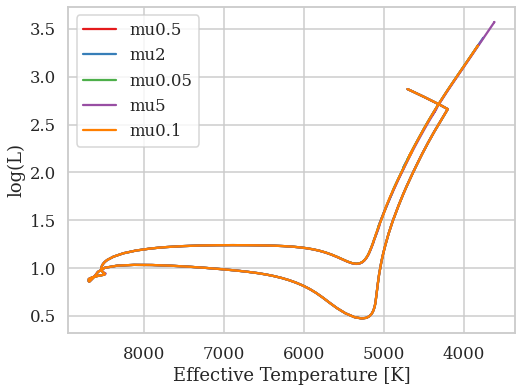

In [5]:
fig, ax = plt.subplots(1, figsize=(8,6))
for f in files[:-1]:
    m = MesaData(f)
    ax.plot(m.effective_T, m.log_L, label=f.split('/')[-1].split('_')[-1][:-5])
    
ax.set_xlabel('Effective Temperature [K]')
ax.set_ylabel('log(L)')
plt.gca().invert_xaxis()
ax.legend();

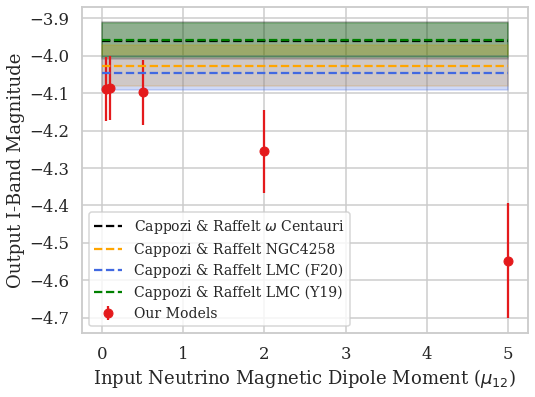

In [7]:
magFile = os.path.join(datadir, 'WorthyLeeBC', 'colorCorrections.txt')
magData = np.loadtxt(magFile, dtype=float, delimiter=',')
fig, ax = plt.subplots(1, figsize=(8,6))
magNoMM = magData[-1][2]
mags = magData[:, 2][:-1] #- magNoMM
err = magData[:, 3][:-1]
mu = [float(f.split('/')[-1].split('_')[-1][2:-5]) for f in files[:-1]]

ax.errorbar(mu, mags, fmt='o', yerr=err, label='Our Models')

x = np.linspace(0, 5)
a=0.25

ax.plot(x, -3.96*np.ones(len(x)), linestyle='--', color='k', label=r'Cappozi & Raffelt $\omega$ Centauri')
ax.fill_between(x, -3.96-0.05, -3.96+0.05, color='k', alpha=a)
ax.plot(x, -4.027*np.ones(len(x)), linestyle='--', color='orange', label=r'Cappozi & Raffelt NGC4258')
ax.fill_between(x, -4.027-0.055, -4.027+0.055, color='orange', alpha=a)
ax.plot(x, -4.047*np.ones(len(x)), linestyle='--', color='royalblue', label=r'Cappozi & Raffelt LMC (F20)')
ax.fill_between(x, -4.047-0.045, -4.047+0.045, color='royalblue', alpha=a)
ax.plot(x, -3.958*np.ones(len(x)), linestyle='--', color='green', label=r'Cappozi & Raffelt LMC (Y19)')
ax.fill_between(x, -3.958-0.046, -3.958+0.046, color='green', alpha=a)


ax.set_ylabel(r'Output I-Band Magnitude') #(\mu_{12})$ - $M_I$($\mu_{12}$=0)
ax.set_xlabel(r'Input Neutrino Magnetic Dipole Moment ($\mu_{12}$)')
ax.legend(loc='lower left', fontsize=14);
#ax.set_xscale('log')
fig.savefig('bounds.jpeg', transparent=False, bbox_inches='tight')

In [60]:
mags, mu, magNoMM

(array([-4.098, -4.255, -4.089, -4.548, -4.086]),
 [0.5, 2.0, 0.05, 5.0, 0.1],
 -4.087)